In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


## Read Data

In [2]:
df_train=pd.read_csv('fraudTrain.csv')

In [3]:
df_test=pd.read_csv('fraudTest.csv')

In [4]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
df_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

In [13]:
df_train['transaction_hour'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
df_test['transaction_hour'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.hour

In [14]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'transaction_hour'],
      dtype='object')

In [15]:
df_train=df_train.drop(columns=['trans_date_trans_time','gender','Unnamed: 0','first','last','cc_num','street','city','state'
                               ,'city_pop','unix_time','dob'],axis=1)
df_test=df_test.drop(columns=['trans_date_trans_time','gender','Unnamed: 0','first','last','cc_num','street','city','state'
                               ,'city_pop','unix_time','dob'],axis=1)

In [16]:
df_train

,merchant,category,amt,zip,lat,long,job,trans_num,merch_lat,merch_long,is_fraud,transaction_hour
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,28654,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,99160,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0
2,fraud_Lind-Buckridge,entertainment,220.11,83252,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,59632,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,0
4,fraud_Keeling-Crist,misc_pos,41.96,24433,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,84735,37.7175,-112.4777,Geoscientist,440b587732da4dc1a6395aba5fb41669,36.841266,-111.690765,0,12
1296671,fraud_Abernathy and Sons,food_dining,51.70,21790,39.2667,-77.5101,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,38.906881,-78.246528,0,12
1296672,fraud_Stiedemann Ltd,food_dining,105.93,88325,32.9396,-105.8189,Naval architect,483f52fe67fabef353d552c1e662974c,33.619513,-105.130529,0,12
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,57756,43.3526,-102.5411,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,42.788940,-103.241160,0,12


## imbalanced

In [17]:
df_train['is_fraud'].value_counts().reset_index()

,is_fraud,count
0,0,1289169
1,1,7506


In [18]:
df_test['is_fraud'].value_counts().reset_index()

,is_fraud,count
0,0,553574
1,1,2145


In [19]:
x_train=df_train.drop(['is_fraud'],axis=1)
y_train=df_train['is_fraud']

In [20]:
x_test=df_test.drop(['is_fraud'],axis=1)
y_test=df_test['is_fraud']

In [21]:
Counter(y_test)

Counter({0: 553574, 1: 2145})

In [22]:
columns=x_train.columns

## split data

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=43)

## Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

def label_encode_all(df_train, df_val, df_test):
    le = LabelEncoder()
  
    train_cols = df_train.select_dtypes(include=['object']).columns
    val_cols = df_val.select_dtypes(include=['object']).columns
    test_cols = df_test.select_dtypes(include=['object']).columns
    
    for df, cols in zip([df_train, df_val, df_test], [train_cols, val_cols, test_cols]):
        for col in cols:
            df[col] = le.fit_transform(df[col])
  

    return df_train, df_val, df_test


In [25]:
x_train,x_val,x_test=label_encode_all(x_train,x_val,x_test)

## Scalling use RobustScaler for  outliers

In [26]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

## by logic apply under_samplling because data is large

In [28]:
from imblearn.under_sampling import RandomUnderSampler

def apply_rus(x_train, y_train, sampling_strategy):
 
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X, Y = rus.fit_resample(x_train, y_train)
    
    return X, Y


In [29]:
x_train_r, y_train_r = apply_rus(x_train, y_train,0.7)
x_val_r, y_val_r = apply_rus(x_val, y_val,0.7)
x_test_r, y_test_r = apply_rus(x_test, y_test,0.7)


In [31]:
Counter(y_train_r)

Counter({0: 8514, 1: 5960})

In [32]:
Counter(y_val_r)

Counter({0: 2208, 1: 1546})

In [33]:
Counter(y_test_r)

Counter({0: 3064, 1: 2145})

In [34]:
x_train_r=pd.DataFrame(x_train_r,columns=columns)
x_val_r=pd.DataFrame(x_val_r,columns=columns)
x_test_r=pd.DataFrame(x_test_r,columns=columns)

In [35]:
x_train_r

,merchant,category,amt,zip,lat,long,job,trans_num,merch_lat,merch_long,transaction_hour
0,-0.209770,-0.571429,0.437534,-0.201987,-0.742196,-0.132290,-0.230453,-0.146308,-0.756898,-0.145617,-1.083333
1,-0.402299,0.285714,1.411132,0.050104,0.498490,-0.344940,0.646091,-0.700158,0.467355,-0.370187,-0.500000
2,-0.919540,0.142857,-0.524088,0.031831,0.669217,0.147831,-0.193416,0.754638,0.682441,0.137392,0.500000
3,-0.962644,0.571429,-0.538786,0.612903,-0.877976,-0.587260,0.419753,0.780066,-0.841869,-0.567761,0.166667
4,-0.201149,-0.142857,-0.506124,-0.431197,-0.689244,0.549261,-0.390947,0.658293,-0.694952,0.492693,0.416667
...,...,...,...,...,...,...,...,...,...,...,...
14469,0.169540,0.285714,10.314371,0.149896,0.835244,-0.345535,0.868313,-0.744334,0.956769,-0.396791,0.750000
14470,0.017241,-0.285714,3.371121,-0.437834,-0.615200,0.449183,0.567901,-0.934727,-0.505478,0.404148,-0.916667
14471,-0.399425,-0.142857,-0.362956,0.636699,-1.277367,-0.469087,0.802469,-0.045984,-1.342694,-0.414205,0.666667
14472,-0.959770,-0.285714,3.038378,-0.708372,0.163390,0.489976,0.543210,0.590774,0.149115,0.492819,-0.916667


In [36]:
Counter(y_train_r)

Counter({0: 8514, 1: 5960})

## Feature Engineering
 # Select best feature using lasso and try pca 

In [38]:
from sklearn.linear_model import LassoCV

Lasso=LassoCV(cv=3)
Lasso.fit(x_train_r,y_train_r)


LassoCV(cv=3)

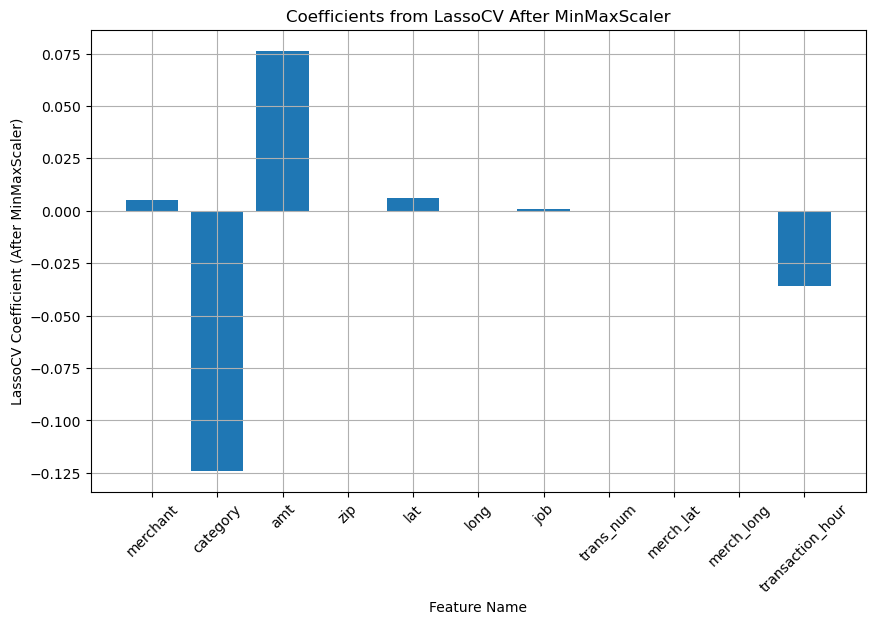

Important Features (based on absolute coefficient magnitude): ['category', 'amt', 'transaction_hour']


In [44]:
import matplotlib.pyplot as plt

coefs = Lasso.coef_

feature_names = columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefs)
plt.xlabel("Feature Name")
plt.ylabel("LassoCV Coefficient (After MinMaxScaler)")
plt.title("Coefficients from LassoCV After MinMaxScaler")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

threshold = 0.01
important_features = [feature_names[i] for i, coef in enumerate(coefs) if abs(coef) >= threshold]

print("Important Features (based on absolute coefficient magnitude):", important_features)

In [45]:
x_train_lasso=x_train_r[['category', 'amt', 'transaction_hour']]
x_val_lasso=x_val_r[['category', 'amt', 'transaction_hour']]
x_test_lasso=x_test_r[['category', 'amt', 'transaction_hour']]

## pca

In [52]:
from sklearn.decomposition import PCA
pca = PCA()

x_train_=pca.fit_transform(x_train_r)
x_val_=pca.transform(x_val_r)
x_test_=pca.transform(x_test_r)


ex_var_ratio=pca.explained_variance_ratio_
cumlative_var_ratio=np.cumsum(ex_var_ratio)

n_component=np.argmax(cumlative_var_ratio>=0.5)+1
print(f'best number of K ={n_component}')


best number of K =1


In [53]:
pca = PCA(n_components=1)

x_train_pca=pca.fit_transform(x_train_r)
x_val_pca=pca.transform(x_val_r)
x_test_pca=pca.transform(x_test_r)

In [65]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,auc,roc_auc_score,roc_curve,confusion_matrix

## tuning logistic regression

In [55]:
params_grid1={  
    'penalty':['l1','l2'],
    'C':[0.01,0.1,1,10,100],
    'solver' : ['liblinear','saga'],
    'max_iter' : [100,300,600,900,1200,1500]
}

In [56]:
tuning_Log_Reg=GridSearchCV(estimator=LogisticRegression(),param_grid=params_grid1,cv=10,n_jobs=-1,verbose=2)
tuning_Log_Reg.fit(x_train_lasso,y_train_r)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 300, 600, 900, 1200, 1500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [57]:
print(f"Best Score : {tuning_Log_Reg.best_score_}")
print(f"Best Paramaters : {tuning_Log_Reg.best_params_}")

Best Score : 0.8854476493564508
Best Paramaters : {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [58]:
Log_Reg_= LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='saga')

Log_Reg_.fit(x_train_lasso,y_train_r)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [60]:
y_train_pred1=Log_Reg_.predict(x_train_lasso)
print(classification_report(y_train_r,y_train_pred1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8514
           1       0.95      0.76      0.84      5960

    accuracy                           0.89     14474
   macro avg       0.90      0.87      0.88     14474
weighted avg       0.89      0.89      0.88     14474



In [61]:
y_val_pred1=Log_Reg_.predict(x_val_lasso)
print(classification_report(y_val_r,y_val_pred1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2208
           1       0.94      0.73      0.82      1546

    accuracy                           0.87      3754
   macro avg       0.89      0.85      0.86      3754
weighted avg       0.88      0.87      0.87      3754



In [63]:
y_test_pred1=Log_Reg_.predict(x_test_lasso)
print(classification_report(y_test_r,y_test_pred1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3064
           1       0.94      0.74      0.83      2145

    accuracy                           0.87      5209
   macro avg       0.89      0.85      0.86      5209
weighted avg       0.88      0.87      0.87      5209



In [64]:
print(confusion_matrix(y_test_r,y_test_pred1))

[[2960  104]
 [ 556 1589]]


## tuning Decision Tree

In [85]:

param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [86]:
tuning_Decision_Tree=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid2, 
                                         cv=3,  verbose=1,n_jobs=-1)
tuning_Decision_Tree.fit(x_train_lasso,y_train_r)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [89]:
print(f"Best Score : {tuning_Decision_Tree.best_score_}")
print(f"Best Paramaters : {tuning_Decision_Tree.best_params_}")

Best Score : 0.970913452312416
Best Paramaters : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [90]:
tuning_Decision_Tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [91]:
DecisionTree=DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

DecisionTree.fit(x_train_lasso,y_train_r)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [92]:
y_train_pred2=DecisionTree.predict(x_train_lasso)
print(classification_report(y_train_r,y_train_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8514
           1       0.98      0.97      0.97      5960

    accuracy                           0.98     14474
   macro avg       0.98      0.98      0.98     14474
weighted avg       0.98      0.98      0.98     14474



In [93]:
y_val_pred2=DecisionTree.predict(x_val_lasso)
print(classification_report(y_val_r,y_val_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2208
           1       0.96      0.96      0.96      1546

    accuracy                           0.97      3754
   macro avg       0.97      0.97      0.97      3754
weighted avg       0.97      0.97      0.97      3754



In [94]:
y_test_pred2=DecisionTree.predict(x_test_lasso)
print(classification_report(y_test_r,y_test_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3064
           1       0.96      0.95      0.96      2145

    accuracy                           0.96      5209
   macro avg       0.96      0.96      0.96      5209
weighted avg       0.96      0.96      0.96      5209



In [95]:
print(confusion_matrix(y_test_r,y_test_pred2))

[[2982   82]
 [ 102 2043]]


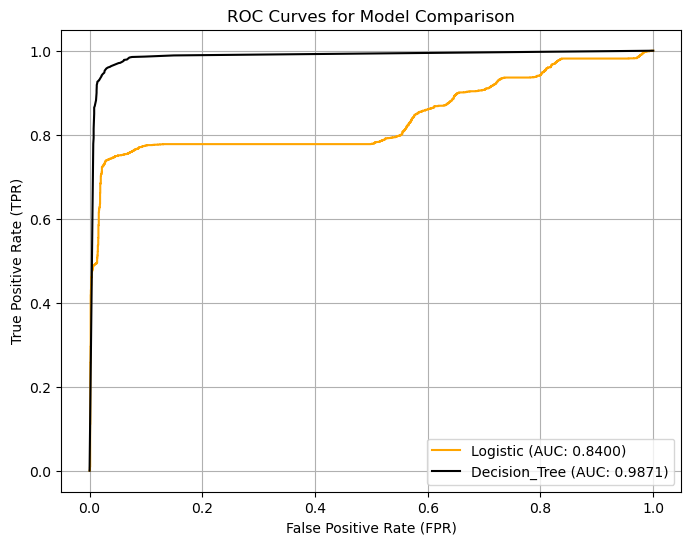

In [96]:
y_pred_log = Log_Reg_.predict_proba(x_test_lasso)[:, 1]
y_pred_dt = DecisionTree.predict_proba(x_test_lasso)[:, 1]  # Probability of positive class for Logistic Regression

# Calculate ROC curves and AUC scores
fpr_log, tpr_log, _ = roc_curve(y_test_r, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

fpr_dt_, tpr_dt_, _ = roc_curve(y_test_r, y_pred_dt)
auc_dt_ = auc(fpr_dt_, tpr_dt_)


# Plot the ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label='Logistic (AUC: {:.4f})'.format(auc_log),color='orange')
plt.plot(fpr_dt_, tpr_dt_, label='Decision_Tree (AUC: {:.4f})'.format(auc_dt_),color='black')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
import pickle 

with open('Fraud.pkl', 'wb') as f:
    pickle.dump(DecisionTree, f)

